In [170]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Trial I

In [171]:
def d(t, g, M_c, M_a, M_h, M_m):
    return 0.1 + 0.5*M_h*g/(M_c + M_a + M_h + M_m)*t**2

In [172]:
g = 9.81      # m/s^2

M_c1 = 0.475   # kg

M_a1 = 0     # kg For trial one additional mass is zero  

M_m1  = 0    # kg for trial one mystry mass is zero

M_h1 = 50.0/1000  # kg   


In [173]:
t1 = np.arange(0, 20.5, 0.5)

In [174]:
np.shape(t1)

(41,)

In [175]:
random_error = np.random.rand()
random_error

0.13893128437969626

In [176]:
def dis_noise(distance, prm):
    d1 = []
    i = 0
    for data in distance:
        d_e = data + prm*data*np.random.rand()
        d1.append(d_e)
        i += 1
    return d1

[0.10822730095134273, 0.23777959075263821, 0.6041619025508125, 1.1776731997242587]


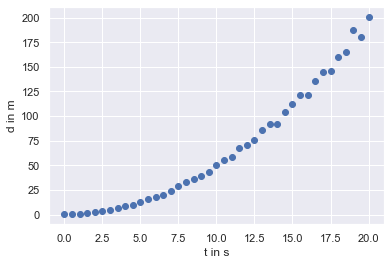

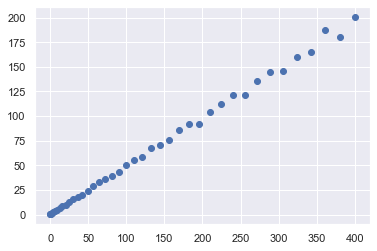

In [178]:

g = 9.81      # m/s^2

M_c1 = 0.475   # kg

M_a1 = 0     # kg For trial one additional mass is zero  

M_m1  = 0    # kg for trial one mystry mass is zero

M_h1 = 50.0/1000  # kg   


distance = d(t1, g, M_c1, M_a1, M_h1, M_m1)
distance[0:5]

d1 = dis_noise(distance, 0.12)
print(d1[0:4])

plt.scatter(t1, d1)
plt.xlabel('t in s')
plt.ylabel('d in m')
plt.show()


t2 = t1**2

plt.scatter(t2, d1)
plt.show()

## Trial2

[0.11113145062627089, 0.17621760678362292, 0.375320583045579, 0.6725338958351216]


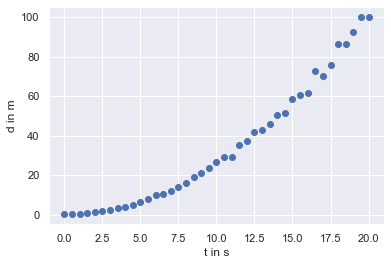

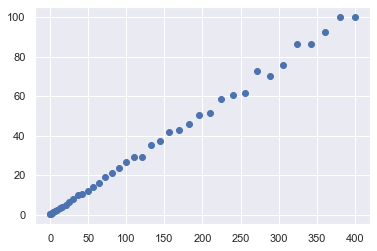

In [180]:
M_c2 = 0.475   # kg

M_a1 = 0.5     # kg For trial one additional mass is zero  

M_m2  = 0    # kg for trial one mystry mass is zero

M_h1 = 50.0/1000  # kg   


distance2 = d(t1, g, M_c2, M_a2, M_h2, M_m2)
distance2[0:5]

d2 = dis_noise(distance2, 0.12)
print(d2[0:4])

plt.scatter(t1, d2)
plt.xlabel('t in s')
plt.ylabel('d in m')
plt.show()


t2 = t1**2

plt.scatter(t2, d2)
plt.show()

## Trial 3

[0.10852565012348331, 0.13743537815600526, 0.2470575605776799, 0.4268589599246793]


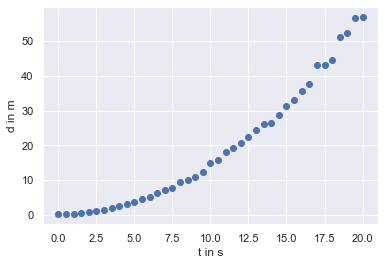

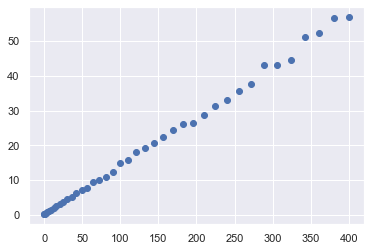

In [181]:
M_c3 = 0.475   # kg

M_a3 = 0.5     # kg For trial one additional mass is zero  

M_m3  = 0.8    # kg for trial one mystry mass is zero

M_h3 = 50.0/1000  # kg   


distance3 = d(t1, g, M_c3, M_a3, M_h3, M_m3)
distance3[0:5]

d3 = dis_noise(distance3, 0.12)
print(d3[0:4])


plt.scatter(t1, d3)
plt.xlabel('t in s')
plt.ylabel('d in m')
plt.show()

t2 = t1**2

plt.scatter(t2, d3)
plt.show()

In [182]:
d_t = pd.DataFrame( {"time-s" : t1, "dis-trial1" : d1, "dis-trial2" : d2, "dis-trial3" : d3} ) 

In [183]:
d_t.head()

,time-s,dis-trial1,dis-trial2,dis-trial3
0,0.0,0.108227,0.111131,0.108526
1,0.5,0.237780,0.176218,0.137435
2,1.0,0.604162,0.375321,0.247058
3,1.5,1.177673,0.672534,0.426859
4,2.0,2.196505,1.132438,0.656632


In [187]:
d_t.to_csv("data-expt4.csv", header=True, index=False)

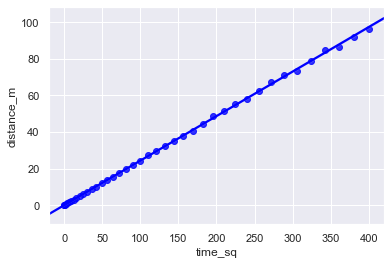

In [29]:
import seaborn as sns; sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
ax = sns.regplot(x="time_sq", y="distance_m", data=d_tsq, order=1, color='blue')

In [155]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [156]:
reg_fit = ols('distance_m ~ time_sq', d_tsq).fit()
print(reg_fit.summary())

                            OLS Regression Results                            
Dep. Variable:             distance_m   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.778e+05
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           5.68e-73
Time:                        18:46:59   Log-Likelihood:                -24.972
No. Observations:                  41   AIC:                             53.94
Df Residuals:                      39   BIC:                             57.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0018      0.106      0.017      0.9

In [165]:
reg_fit._coef

AttributeError: 'OLSResults' object has no attribute '_coef'

In [142]:
type(reg_fit.summary)

method

In [157]:

m = 0.2455

b = 0.0018


In [160]:
a_fit = 2*m
a_fit

0.491

In [161]:
d1 = m*d_tsq['time_sq'] + b
d_tsq['d_best_fit'] = d1
d_tsq.head()

,time_s,time_sq,distance_m,d_best_fit
0,0.0,0.00,0.102890,0.001800
1,0.5,0.25,0.162232,0.063175
2,1.0,1.00,0.342269,0.247300
3,1.5,2.25,0.642902,0.554175
4,2.0,4.00,1.062601,0.983800


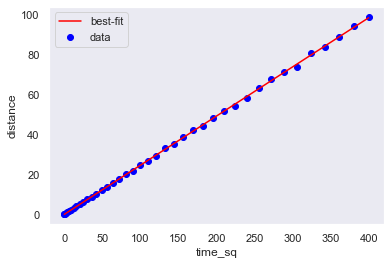

In [163]:
plt.scatter(d_tsq.time_sq, d_tsq.distance_m, color='blue', marker='o', label='data')
plt.plot(d_tsq.time_sq, d_tsq.d_best_fit, color='red', label='best-fit')
plt.xlabel('time_sq')
plt.ylabel('distance')
plt.legend()
plt.grid()
plt.show()